## Let's test the effect of parallelism on some computation in python

Start with telling numpy to use different amount threads
This notebook works on Intel processors were mkl can be used
We use mkl.set_num_threads(i) to set # of Threads to be used by numpy
The example multiplies two Matrixes and a Matrix against a Vector
Tested in Jupyter (Anaconda)

In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
import mkl
#define sizes
MAX_Thr = 14   #Maximun Number of Threads
NUM_TESTS = 10 #repeat several times to reduce erros in measurement
n = 1024 * 4
p = 32 * 4

In [21]:
## Gen Vectors
A = np.random.rand(n, n)
X = np.random.rand(n, p)
X1 = np.random.rand(n, 1)

In [22]:
def mul_dot_timed(NUM_Iter = NUM_TESTS):
    t = time.time()
    for i in range(NUM_Iter):
        np.dot(A, X)
    elapsed_4t_mm = time.time() - t
    return (elapsed_4t_mm/NUM_Iter)

In [23]:
def mul_vect_timed(NUM_Iter = NUM_TESTS):
    t = time.time()
    for i in range(NUM_Iter):
        np.dot(A, X1)
    elapsed_4t_mm = time.time() - t
    return (elapsed_4t_mm/NUM_Iter)

In [27]:
tm = []
tv = []
for i in range(1, MAX_Thr+1):
    mkl.set_num_threads(i)
    tm.append(mul_dot_timed())
    tv.append(mul_vect_timed())
    print("num thr:", i, "Mul mat time", tm[-1], "sec. Mul vect time", tv[-1],"sec.")
    

num thr: 1 Mul mat time 0.10211553573608398 sec. Mul vect time 0.008990263938903809 sec.
num thr: 2 Mul mat time 0.058735203742980954 sec. Mul vect time 0.008144021034240723 sec.
num thr: 3 Mul mat time 0.043115091323852536 sec. Mul vect time 0.00818934440612793 sec.
num thr: 4 Mul mat time 0.03925979137420654 sec. Mul vect time 0.016060662269592286 sec.
num thr: 5 Mul mat time 0.04414920806884766 sec. Mul vect time 0.014147400856018066 sec.
num thr: 6 Mul mat time 0.03838484287261963 sec. Mul vect time 0.008078312873840332 sec.
num thr: 7 Mul mat time 0.04936807155609131 sec. Mul vect time 0.007978558540344238 sec.
num thr: 8 Mul mat time 0.03570480346679687 sec. Mul vect time 0.008078360557556152 sec.
num thr: 9 Mul mat time 0.03450782299041748 sec. Mul vect time 0.00797865390777588 sec.
num thr: 10 Mul mat time 0.037700223922729495 sec. Mul vect time 0.00834343433380127 sec.
num thr: 11 Mul mat time 0.03869931697845459 sec. Mul vect time 0.008078384399414062 sec.
num thr: 12 Mul mat

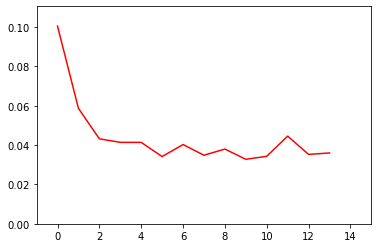

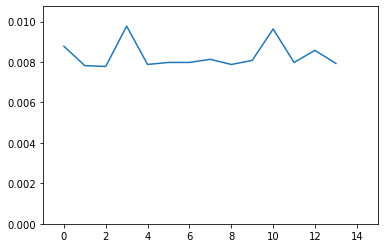

In [25]:
# Plot Matrix Multiplication
plt.plot(tm, color='red')
plt.axis([-1, MAX_Thr+1, 0, max(tm)*1.1])
plt.show()

# Plot matrix by vector Multiplciation
plt.plot(tv, '')
plt.axis([-1, MAX_Thr+1, 0, max(tv)*1.1])
plt.show()


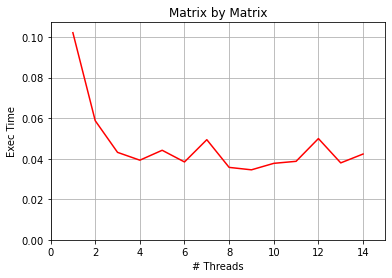

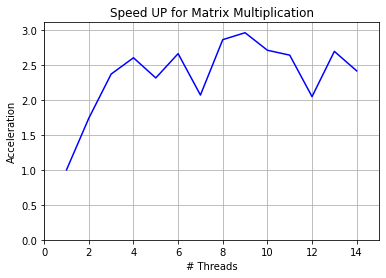

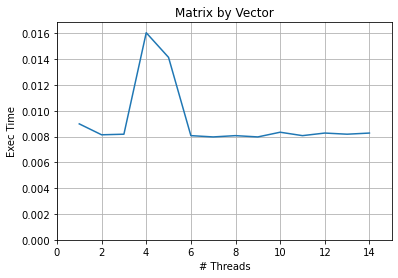

In [28]:
#Same Plots but more details 
nThr = np.arange(1, MAX_Thr+1, 1)
plt.plot(nThr, tm, color='red')
plt.axis([0, MAX_Thr+1, 0, max(tm)*1.05])
plt.title('Matrix by Matrix')
plt.grid(True)
plt.xlabel('# Threads')
plt.ylabel('Exec Time')
plt.show()

# Plot Speed UP of Mat mul
max_tm = max(tm)
spUp =[max_tm/i for i in tm]
#spUp = np.divide(tm, max_tm)
plt.plot(nThr, spUp, color='blue')
plt.axis([0, MAX_Thr+1, 0, max(tm)/min(tm)*1.05])
plt.title('Speed UP for Matrix Multiplication')
plt.grid(True)
plt.xlabel('# Threads')
plt.ylabel('Acceleration')
plt.show()

plt.plot(nThr, tv, '')
plt.axis([0, MAX_Thr+1, 0, max(tv)*1.05])
plt.title('Matrix by Vector')
plt.grid(True)
plt.xlabel('# Threads')
plt.ylabel('Exec Time')
plt.show()